Saving Participants Spreadsheet - Plotting.csv to Participants Spreadsheet - Plotting (4).csv


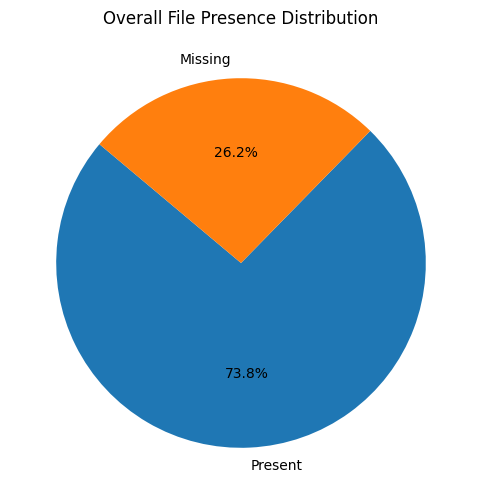

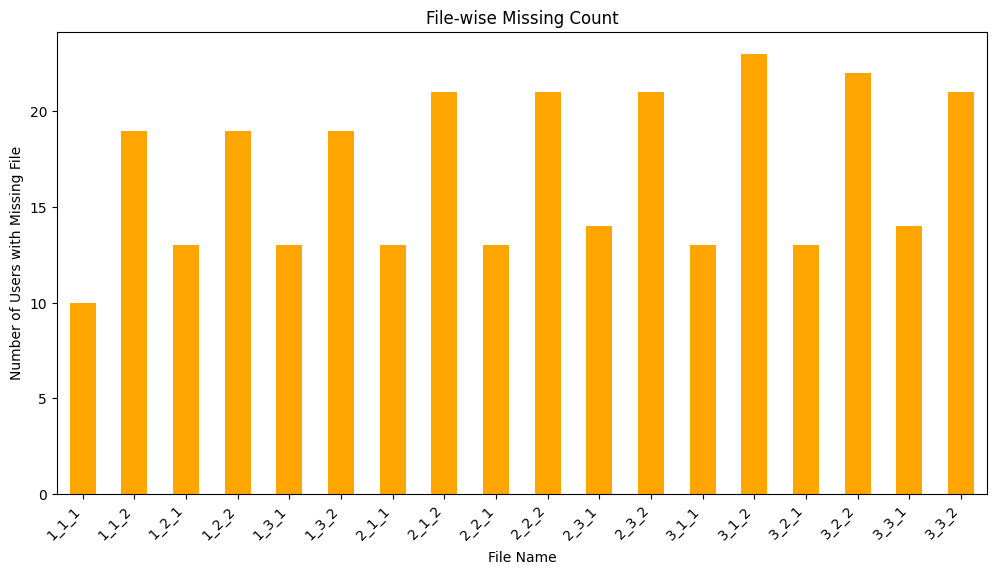

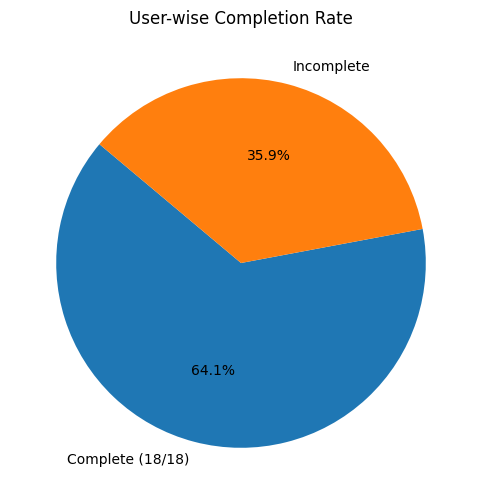

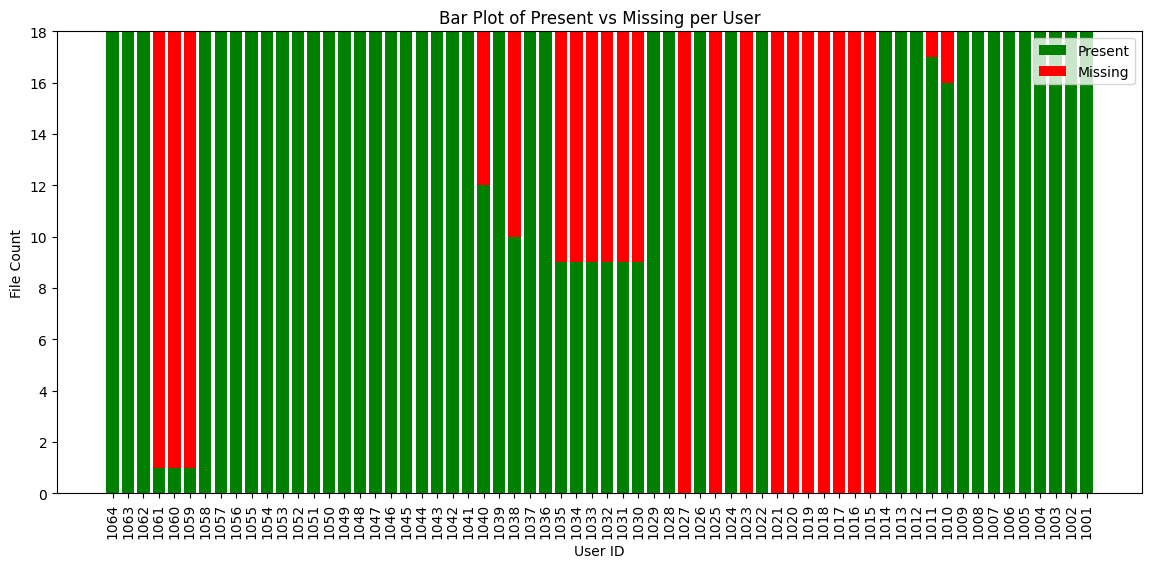

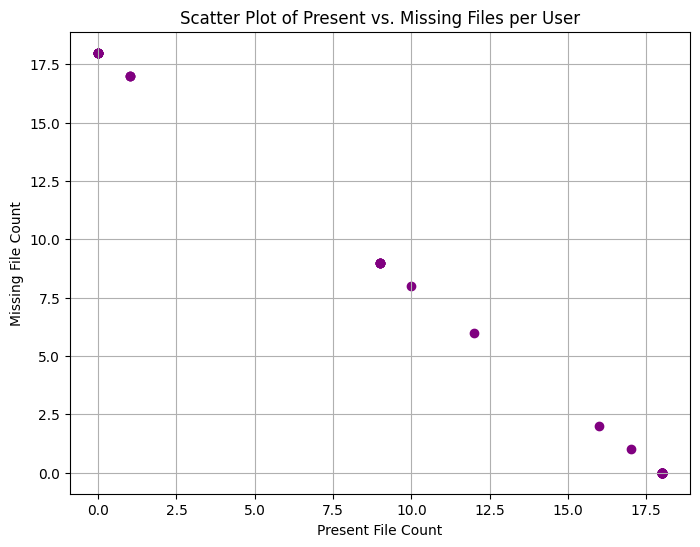

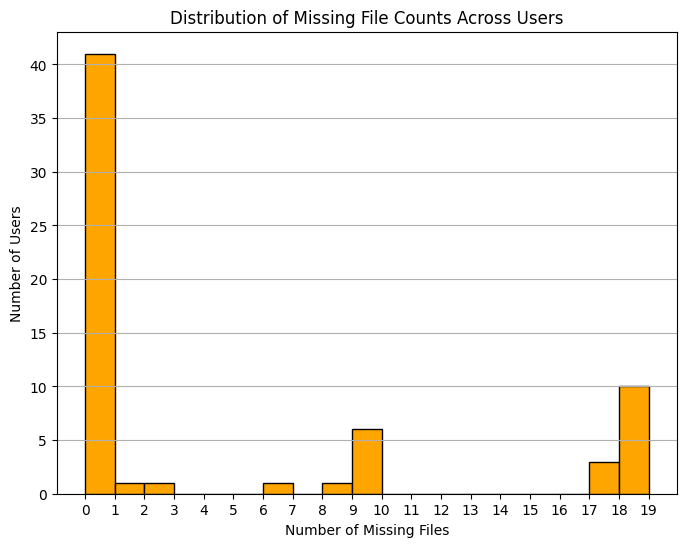

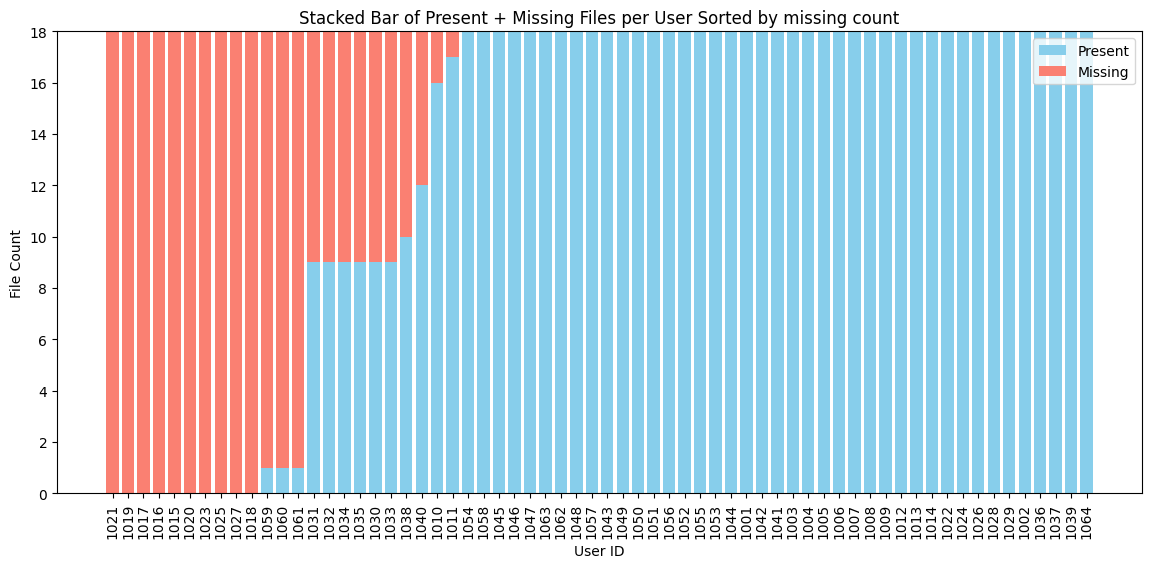

📊 Summary Statistics:
Total Users: 64
Users with Complete Data: 41
Users with Incomplete Data: 23
Total Files Expected: 1152
Files Present: 850
Files Missing: 302


In [5]:
# ================================
# Step 1: Import Libraries
# ================================
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ================================
# Step 2: Upload File
# ================================
uploaded = files.upload()  # Prompt to upload file

# Load the uploaded CSV file
file_name = list(uploaded.keys())[0]  # get the first (uploaded) file name
df = pd.read_csv(file_name)

# Display first few rows to understand the dataset
df.head()

# ================================
# Step 3: Summary Statistics
# ================================

# Summarizing total Present and Missing counts across all users
total_present = (df.iloc[:, 1:-2] == 'Present').sum().sum()
total_missing = (df.iloc[:, 1:-2] == 'Missing').sum().sum()
total_files = total_present + total_missing

# File-wise presence and missing counts
file_presence_counts = (df.iloc[:, 1:-2] == 'Present').sum()
file_missing_counts = (df.iloc[:, 1:-2] == 'Missing').sum()

# User-wise completion stats
complete_users = (df['Present_Count'] == 18).sum()
incomplete_users = (df['Missing_Count'] > 0).sum()
total_users = len(df)

# ================================
# Step 4: Visualization
# ================================

# 4.1 Pie chart of total present vs missing
plt.figure(figsize=(6, 6))
plt.pie([total_present, total_missing], labels=['Present', 'Missing'], autopct='%1.1f%%', startangle=140)
plt.title('Overall File Presence Distribution')
plt.show()

# 4.2 Bar plot for file-wise missing files
plt.figure(figsize=(12, 6))
file_missing_counts.plot(kind='bar', color='orange')
plt.title('File-wise Missing Count')
plt.ylabel('Number of Users with Missing File')
plt.xlabel('File Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4.3 Pie chart of user-wise completion status
plt.figure(figsize=(6, 6))
plt.pie([complete_users, incomplete_users], labels=['Complete (18/18)', 'Incomplete'], autopct='%1.1f%%', startangle=140)
plt.title('User-wise Completion Rate')
plt.show()

# ================================
# 4.4: Bar Plot of Present vs Missing per User
# ================================
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('USER ID', ascending=False)  # Sort by USER ID for visibility
plt.bar(df_sorted['USER ID'].astype(str), df_sorted['Present_Count'], label='Present', color='green')
plt.bar(df_sorted['USER ID'].astype(str), df_sorted['Missing_Count'], bottom=df_sorted['Present_Count'], label='Missing', color='red')
plt.xlabel('User ID')
plt.ylabel('File Count')
plt.title('Bar Plot of Present vs Missing per User')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# ================================
# 4.5: Scatter Plot of Present vs Missing
# ================================
plt.figure(figsize=(8, 6))
plt.scatter(df['Present_Count'], df['Missing_Count'], color='purple')
plt.xlabel('Present File Count')
plt.ylabel('Missing File Count')
plt.title('Scatter Plot of Present vs. Missing Files per User')
plt.grid(True)
plt.show()

# ================================
# 4.6: Histogram of Missing File Count Distribution
# ================================
plt.figure(figsize=(8, 6))
df['Missing_Count'].plot(kind='hist', bins=range(0, 20), color='orange', edgecolor='black')
plt.xlabel('Number of Missing Files')
plt.ylabel('Number of Users')
plt.title('Distribution of Missing File Counts Across Users')
plt.xticks(range(0, 20))
plt.grid(axis='y')
plt.show()

# ================================
# 4.7: Stacked Bar for Each User (Present + Missing)
# ================================
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('Missing_Count', ascending=False)  # Sort by missing count for visibility
plt.bar(df_sorted['USER ID'].astype(str), df_sorted['Present_Count'], label='Present', color='skyblue')
plt.bar(df_sorted['USER ID'].astype(str), df_sorted['Missing_Count'], bottom=df_sorted['Present_Count'], label='Missing', color='salmon')
plt.xlabel('User ID')
plt.ylabel('File Count')
plt.title('Stacked Bar of Present + Missing Files per User Sorted by missing count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# ================================
# Step 5: Display Summary Statistics
# ================================

summary = {
    "Total Users": total_users,
    "Users with Complete Data": complete_users,
    "Users with Incomplete Data": incomplete_users,
    "Total Files Expected": total_files,
    "Files Present": total_present,
    "Files Missing": total_missing,
}

print("📊 Summary Statistics:")
for key, value in summary.items():
    print(f"{key}: {value}")

